<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/unit-4/notebook_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hydrogen (angular) wave functions

## Exercise: plotting Spherical Harmonics

### Method 1. From scratch

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math as mt

In [3]:
# Function for spherical coordinates:

def spherical_coordinates(r, theta, phi):
    """
    Function to compute the spherical coordinates.

    """

    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return x, y, z


def legendre_polynomial(l, m, x):
    """
    Function to compute Lengendre polynomials
    """

    pmm = 1.0

    if m > 0:
        sign = (-1.0)**m
        pmm = sign * pow(mt.factorial(2 * m - 1) * (1. - x**2), (m / 2))

    if l == m:
        return pmm

    pmm_l = x*(2*m + 1)* pmm

    if l == m + 1:
        return pmm_l

    for n in range(m + 2, l + 1):
        pmn = (x * (2*n - 1) * pmm_l - (n + m - 1) * pmm) / (n - m)
        pmm = pmm_l
        pmm_l = pmn

    return pmm_l


In [4]:
# We define quantum numbers
l = 3
m = -1

# Normalisation factor
A = np.sqrt(((2*l + 1)*mt.factorial(1 - abs(m)))\
            / (4*np.pi*mt.factorial(1 + abs(m))))

# Vectors for the angles
phi = np.linspace(0, 2*np.pi, 181)
tht = np.linspace(0, np.pi, 91)

# Generate grid
Phi, Tht = np.meshgrid(phi, tht)

# Spherical Harmonic function
p, q = np.shape(Phi)
Y = np.zeros([p, q], dtype = np.complex64)

# Loop to fill up the surface
for i in range(0, p):
    for j in range(0, q):

        if m > 0:

            Y[i, j] = np.sqrt(2) * A * (np.cos(m * Phi[i, j]) + 1j*np.sin(m * Phi[i, j]))* \
            legendre_polynomial(l, m, np.cos(Tht[i, j]))

        elif m < 0:

            Y[i, j] = np.sqrt(2) * A * (np.cos(abs(m) * Phi[i, j]) + 1j*np.sin(abs(m) * Phi[i, j]))* \
            legendre_polynomial(l, abs(m), np.cos(Tht[i, j]))

        else:

            Y[i, j] = A *  legendre_polynomial(l, 0, np.cos(Tht[i, j]))

p, q = np.shape(Phi)

In [5]:
# Add for 3D plotting:

import mpl_toolkits.mplot3d as mp3d

In [6]:
# Convert to Cartesian Coordinates

x, y, z = spherical_coordinates(abs(Y.real), Tht, Phi)

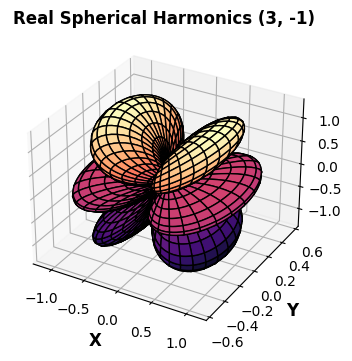

In [8]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Real Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()

In [9]:
# Convert to Cartesian Coordinates

x, y, z = spherical_coordinates(abs(Y.imag), Tht, Phi)

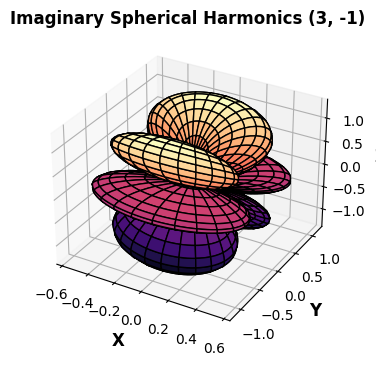

In [11]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Imaginary Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()

In [12]:
x, y, z = spherical_coordinates(abs(Y), Tht, Phi)

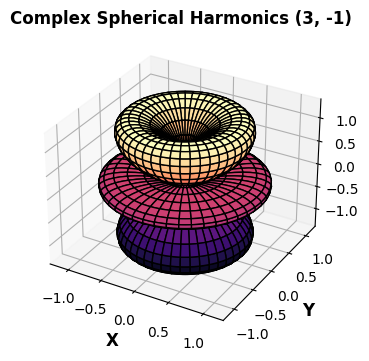

In [13]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Complex Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()

### Method 2: Using scipy


In [14]:
from scipy.special import sph_harm

# https://docs.scipy.org/doc/scipy/reference/special.html

In [16]:
# We need the same meshgrid that we generated above

# Vectors for the angles
#phi = np.linspace(0, 2*np.pi, 181)
#tht = np.linspace(0, np.pi, 91)

# Generate grid
#Phi, Tht = np.meshgrid(phi, tht)

# Call the spherical harmonic:
s_harm = sph_harm(m, l, Phi, Tht)

#print(s_harm.real)

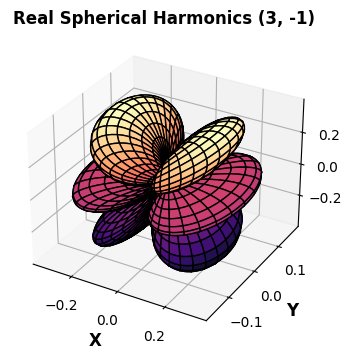

In [17]:
# We need to plot in Cartesian coordinates:

x, y, z = spherical_coordinates(abs(s_harm.real), Tht, Phi)

# Plotting

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Real Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()


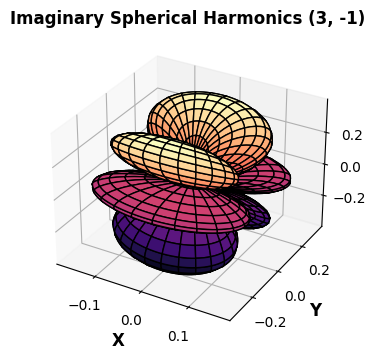

In [19]:
# We need to plot in Cartesian coordinates:

x, y, z = spherical_coordinates(abs(s_harm.imag), Tht, Phi)

# Plotting

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Imaginary Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()

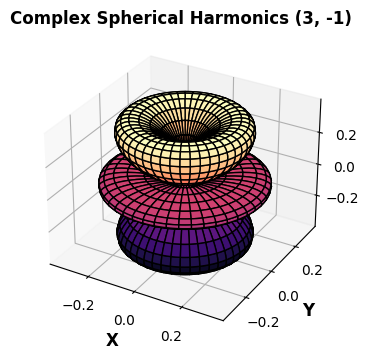

In [20]:
# We need to plot in Cartesian coordinates:

x, y, z = spherical_coordinates(abs(s_harm), Tht, Phi)

# Plotting

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'magma', edgecolor = 'k')

plt.title('Complex Spherical Harmonics ({}, {})'.format(l, m), fontsize = 12, fontweight = 'bold')

ax.set_xlabel('X', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize = 12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize = 12, fontweight = 'bold')

plt.show()